## Import standard packages

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns



## Loading Data

In [86]:
df1=pd.read_csv('title.basics.csv')
df2=pd.read_csv('bom.movie_gross.csv')
df3=pd.read_csv('imdb.title.ratings.csv')


In [87]:
#Making copies of the data frames
df1copy=df1.copy()
df2copy=df2.copy()
df3copy=df3.copy()

## Understanding the data

In [88]:
df1.head()  

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [90]:
missing_percent = df1.isnull().sum() * 100 / len(df1)
missing_percent.sort_values(ascending=True, inplace=True)
print(missing_percent)

tconst              0.000000
start_year          0.000000
primary_title       0.000684
original_title      0.015054
genres              3.700460
runtime_minutes    21.717621
dtype: float64


Missing values in Genres and runtime_minutes

In [91]:
df1.duplicated().sum()

0

## Identifying Outliers

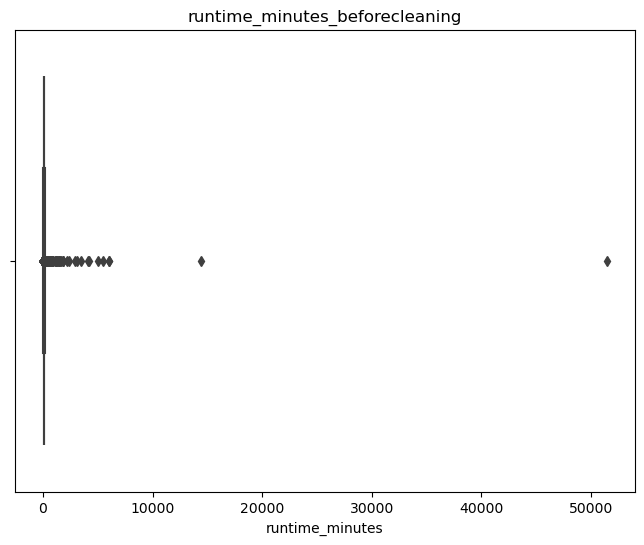

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df1['runtime_minutes'])
plt.title('runtime_minutes_beforecleaning')
plt.show()

There is an extreme outlier on the right

In [93]:
df1.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


## Data Before Cleaning

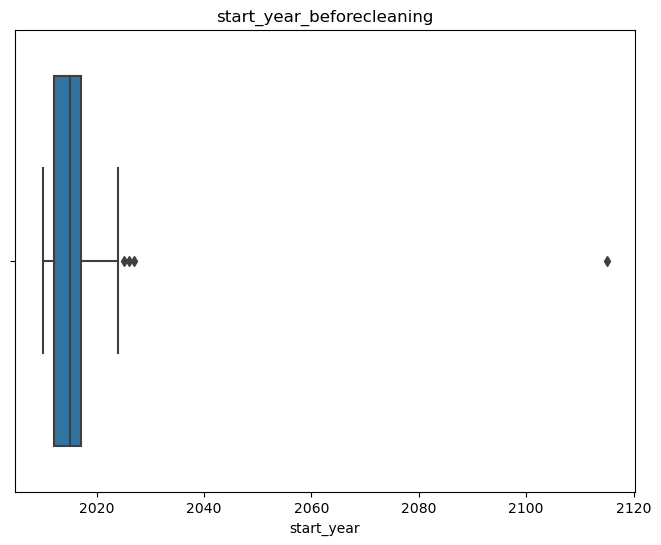

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df1['start_year'])
plt.title('start_year_beforecleaning')
plt.show()

In [95]:
df1.describe()



,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [96]:
df1['runtime_minutes'] = df1['runtime_minutes'].astype('float64')

In [97]:
print(df1['runtime_minutes'].dtype)

float64


In [98]:
print(df1['start_year'].dtype)

int64


In [99]:
df1['start_year'] = df1['start_year'].astype('float64')

In [100]:
df1['start_year'] = pd.to_numeric(df1['start_year'], errors='coerce')


In [101]:
df1['runtime_minutes'] = pd.to_numeric(df1['runtime_minutes'], errors='coerce')


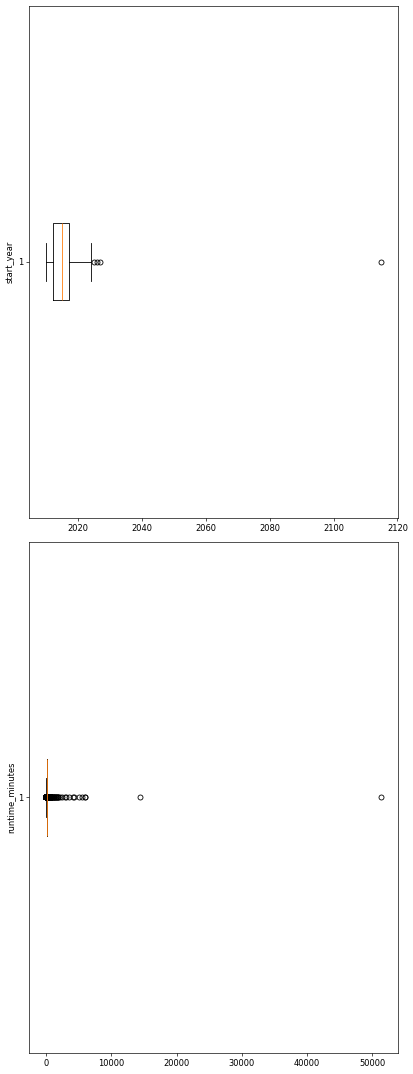

In [102]:
fig, axs = plt.subplots(len(df1.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=60)
for i, col in enumerate(df1.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df1[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

There are outliers in the 'start_year' column.

# Data Cleaning

In [103]:
# Cleaning df1 by removing outliers using the IQR method

cols = [c for c in ['runtime_minutes', 'start_year'] if c in df1.columns and np.issubdtype(df1[c].dtype, np.number)]
if cols:
    mask = pd.Series(True, index=df1.index)
    for col in cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (df1[col].isna()) | ((df1[col] >= lower) & (df1[col] <= upper))
    before = len(df1)
    df1 = df1.loc[mask].copy()
    after = len(df1)
    print(f"Dropped {before - after} rows as outliers across: {cols}")
else:
    print('No numeric columns found to remove outliers from.')

Dropped 6832 rows as outliers across: ['runtime_minutes', 'start_year']


In [104]:
df1.describe()

,start_year,runtime_minutes
count,139312.000000,107577.000000
mean,2014.613429,85.098060
std,2.730269,21.835599
min,2010.000000,27.000000
25%,2012.000000,71.000000
50%,2015.000000,87.000000
75%,2017.000000,98.000000
max,2024.000000,142.000000


In [105]:
df1.isnull().sum()

tconst                 0
primary_title          1
original_title        21
start_year             0
runtime_minutes    31735
genres              5305
dtype: int64

In [106]:
df1['runtime_minutes'] = df1['runtime_minutes'].astype('float64')

In [107]:
Q1 = df1['runtime_minutes'].quantile(0.25)
Q3 = df1['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['runtime_minutes'] >= Q1 - 1.5 * IQR) & (df1['runtime_minutes'] <= Q3 + 1.5 * IQR)]

## Cleaned Df1

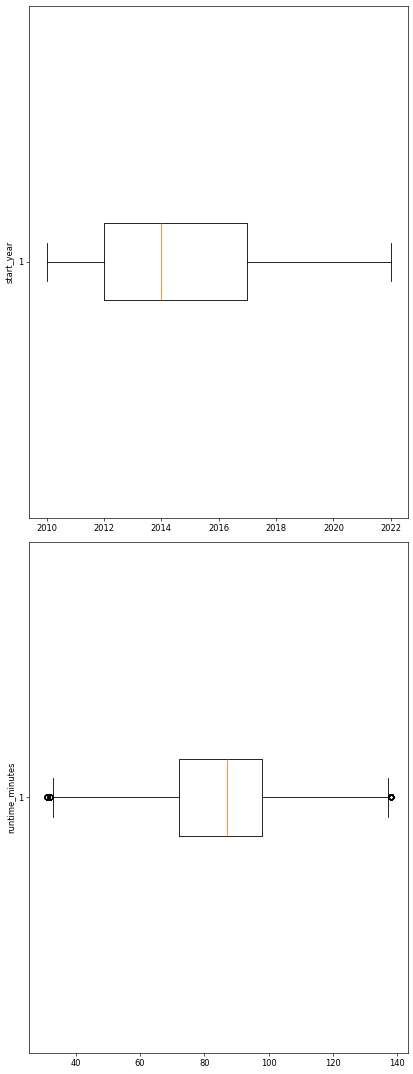

In [108]:
fig, axs = plt.subplots(len(df1.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=60)
for i, col in enumerate(df1.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df1[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

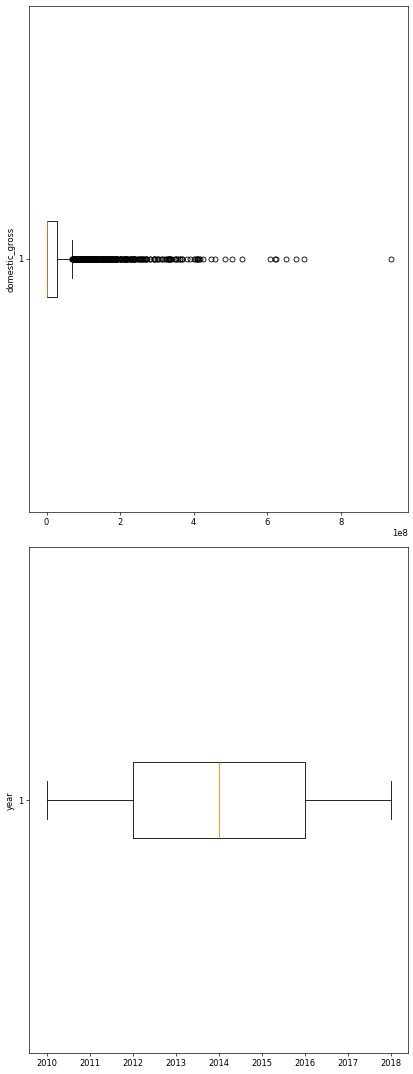

In [109]:
fig, axs = plt.subplots(len(df2.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=60)
for i, col in enumerate(df2.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df2[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

## Cleaning Df2

In [110]:
# Cleaning df2 by removing outliers using the IQR method

Q1 = df2['domestic_gross'].quantile(0.25)
Q3 = df2['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1
df2 = df2[(df2['domestic_gross'] >= Q1 - 1.5 * IQR) & (df2['domestic_gross'] <= Q3 + 1.5 * IQR)]

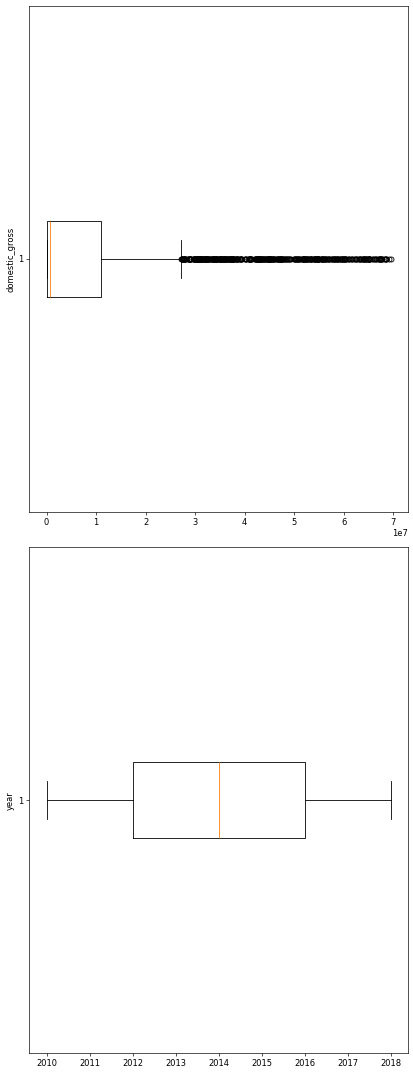

In [111]:
fig, axs = plt.subplots(len(df2.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=60)
for i, col in enumerate(df2.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df2[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

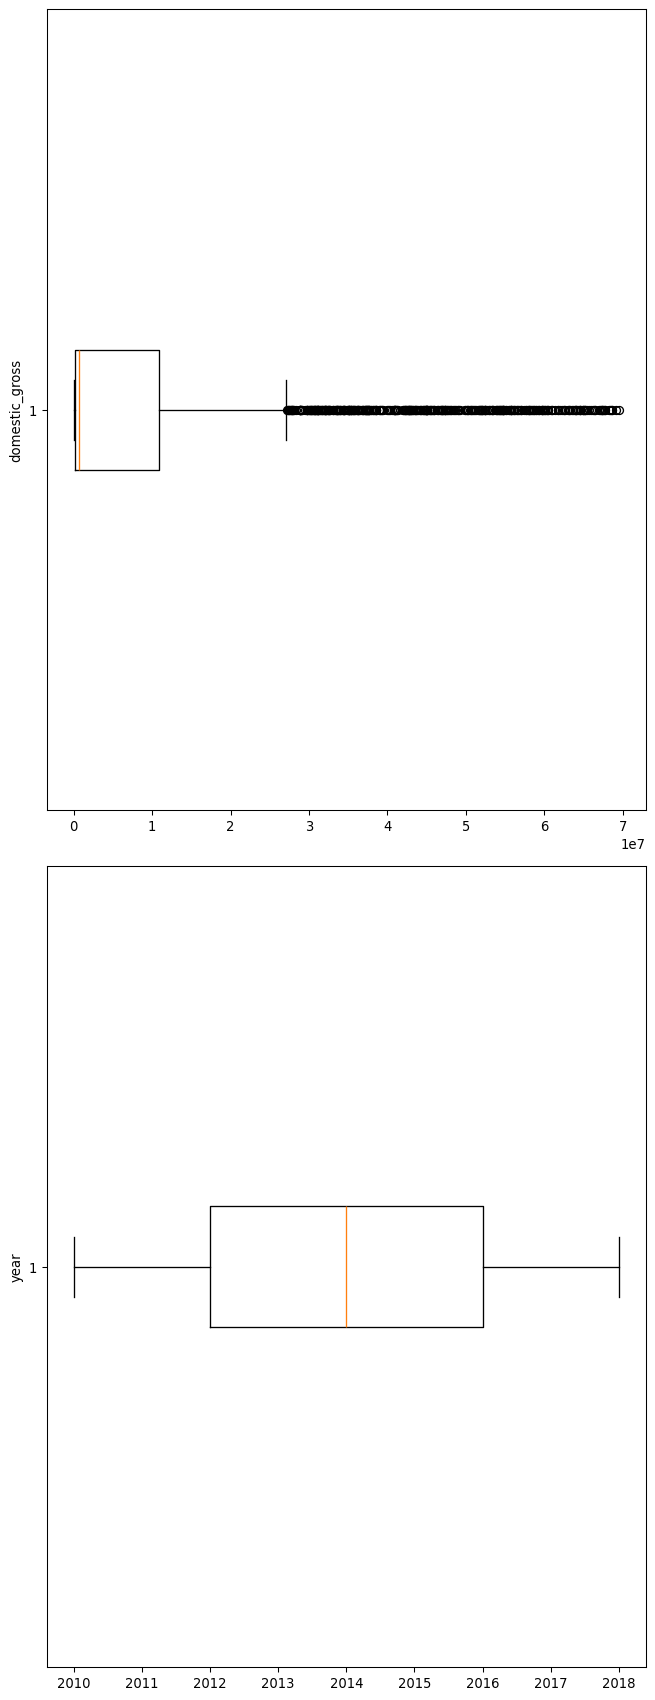

In [112]:
fig, axs = plt.subplots(len(df2.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df2.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df2[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

## Df 3


In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [114]:
df3.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [115]:
df3.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


## Df3 Before Cleaning 

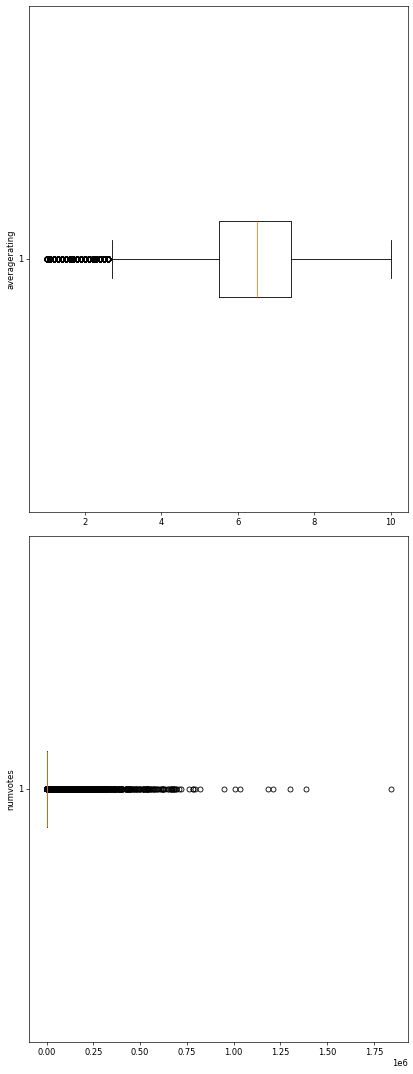

In [116]:
fig, axs = plt.subplots(len(df3.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=60)
for i, col in enumerate(df3.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df3[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

## Df3 After Cleaning

In [117]:
# Cleaning df3 by removing outliers using the IQR method
Q1 = df3['averagerating'].quantile(0.25)
Q3 = df3['averagerating'].quantile(0.75)
IQR = Q3 - Q1
df3 = df3[(df3['averagerating'] >= Q1 - 1.5 * IQR) & (df3['averagerating'] <= Q3 + 1.5 * IQR)]

Q1 = df3['numvotes'].quantile(0.25)
Q3 = df3['numvotes'].quantile(0.75)
IQR = Q3 - Q1
df3 = df3[(df3['numvotes'] >= Q1 - 1.5 * IQR) & (df3['numvotes'] <= Q3 + 1.5 * IQR)]


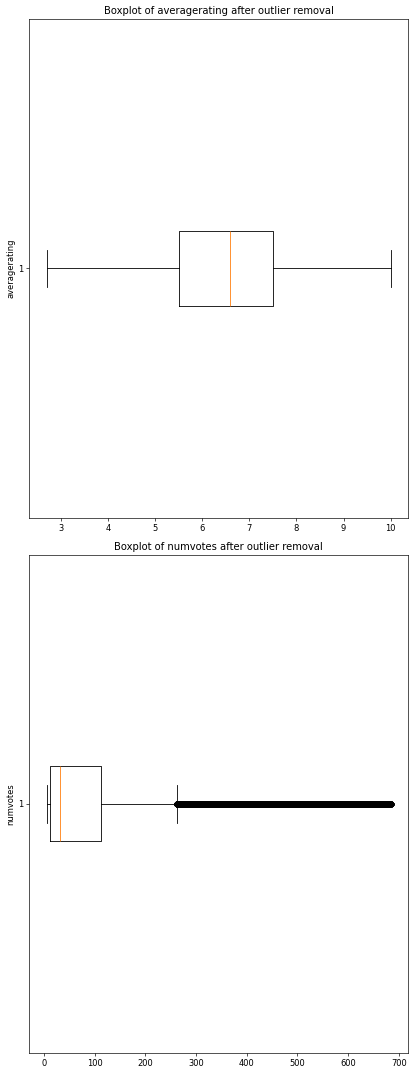

In [118]:
fig, axs = plt.subplots(len(df3.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=60)
for i, col in enumerate(df3.select_dtypes(include=[np.number]).columns):
    axs[i].boxplot(df3[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f'Boxplot of {col} after outlier removal')
plt.tight_layout()
plt.show()


### Visualizations for the Various Data Sets

#### Df1 Data

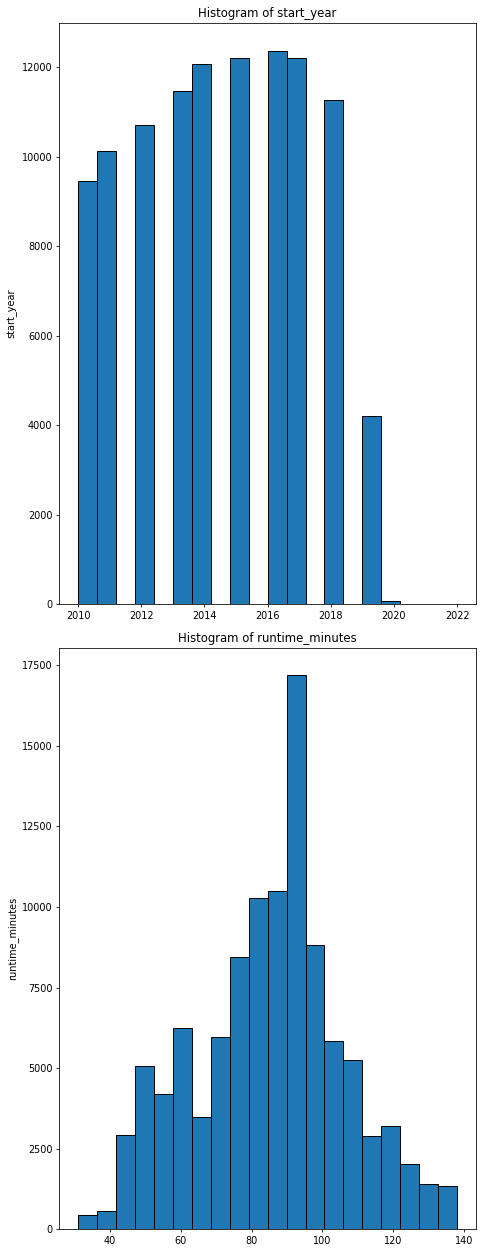

In [119]:
fig, axs = plt.subplots(len(df1.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=70)
for i, col in enumerate(df1.select_dtypes(include=[np.number]).columns):
    axs[i].hist(df1[col].dropna(), bins=20, edgecolor='black')
    axs[i].set_ylabel(col)
    axs[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Df2 Data

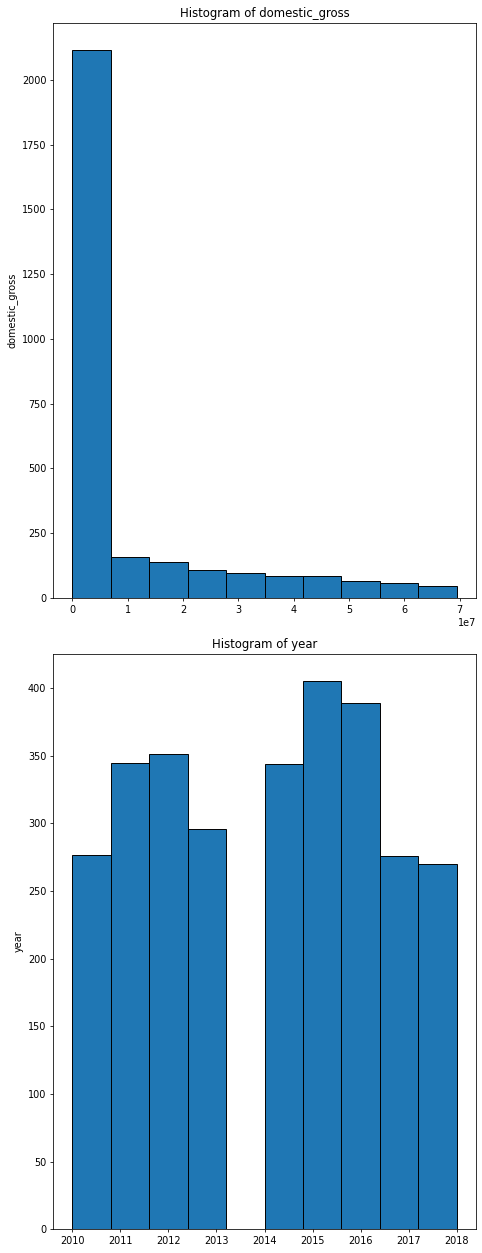

In [120]:
fig, axs = plt.subplots(len(df2.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=70)
for i, col in enumerate(df2.select_dtypes(include=[np.number]).columns):
    axs[i].hist(df2[col].dropna(), bins=10, edgecolor='black',)
    axs[i].set_ylabel(col)
    axs[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Df3 Data

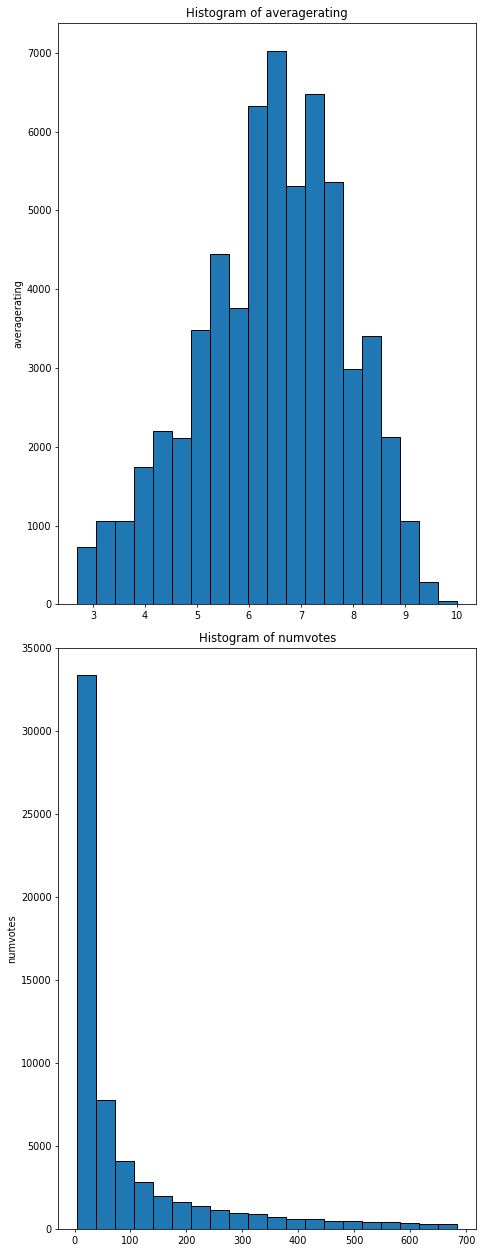

In [121]:
fig, axs = plt.subplots(len(df3.select_dtypes(include=[np.number]).columns), 1, figsize=(7, 18), dpi=70)
for i, col in enumerate(df3.select_dtypes(include=[np.number]).columns):
    axs[i].hist(df3[col].dropna(), bins=20, edgecolor='black')
    axs[i].set_ylabel(col)
    axs[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Top 20's for the various datasets

In [122]:
df2['domestic_gross'].fillna(0, inplace=True)

In [123]:
df1.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018.0,75.0,Comedy
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017.0,83.0,"Adventure,Animation,Comedy"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012.0,82.0,Biography
10,tt0146592,Pál Adrienn,Pál Adrienn,2010.0,136.0,Drama
11,tt0154039,So Much for Justice!,Oda az igazság,2010.0,100.0,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010.0,89.0,Drama
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018.0,60.0,Documentary


In [124]:
# Merging the Different DataFrames

merged = df1.merge(df3, on='tconst', how='inner')

merged['title_normalized'] = merged['primary_title'].str.lower().str.strip()
df2['title_normalized'] = df2['title'].str.lower().str.strip()

final_df = merged.merge(df2[['title_normalized', 'domestic_gross', 'foreign_gross']], 
                        on='title_normalized', how='left')

print(final_df[['primary_title', 'genres', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']].head(20))

                             primary_title                      genres  \
0          One Day Before the Rainy Season             Biography,Drama   
1                 The Wandering Soap Opera        Comedy,Drama,Fantasy   
2                          Joe Finds Grace  Adventure,Animation,Comedy   
3                              Pál Adrienn                       Drama   
4                     So Much for Justice!                     History   
5             Children of the Green Dragon                       Drama   
6                     T.G.M. - osvoboditel                 Documentary   
7                            Heaven & Hell                       Drama   
8                        The Final Journey                       Drama   
9         Los pájaros se van con la muerte               Drama,Mystery   
10                            Gangavataran                         NaN   
11                       Return to Babylon      Biography,Comedy,Drama   
12                       Akakis mogzau

In [125]:
# Since genres contain multiple genres separated by commas, we need to split them
# Explode (separate list to individual rows) the genres so each genre gets its own row
final_df_exploded = final_df.copy()
final_df_exploded['genres'] = final_df_exploded['genres'].str.split(',')
final_df_exploded = final_df_exploded.explode('genres')
final_df_exploded['genres'] = final_df_exploded['genres'].str.strip()

print(final_df_exploded['genres'].value_counts().head(20))

genres
Drama          21290
Documentary    14956
Comedy         11199
Thriller        5099
Horror          4916
Romance         4001
Action          3501
Biography       2789
Family          2744
Crime           2706
Adventure       2358
History         2156
Mystery         1995
Music           1425
Fantasy         1350
Sci-Fi          1332
Animation       1135
Sport            823
War              557
News             539
Name: count, dtype: int64


In [126]:
final_df_exploded['genres'].value_counts().head(20)

genres
Drama          21290
Documentary    14956
Comedy         11199
Thriller        5099
Horror          4916
Romance         4001
Action          3501
Biography       2789
Family          2744
Crime           2706
Adventure       2358
History         2156
Mystery         1995
Music           1425
Fantasy         1350
Sci-Fi          1332
Animation       1135
Sport            823
War              557
News             539
Name: count, dtype: int64

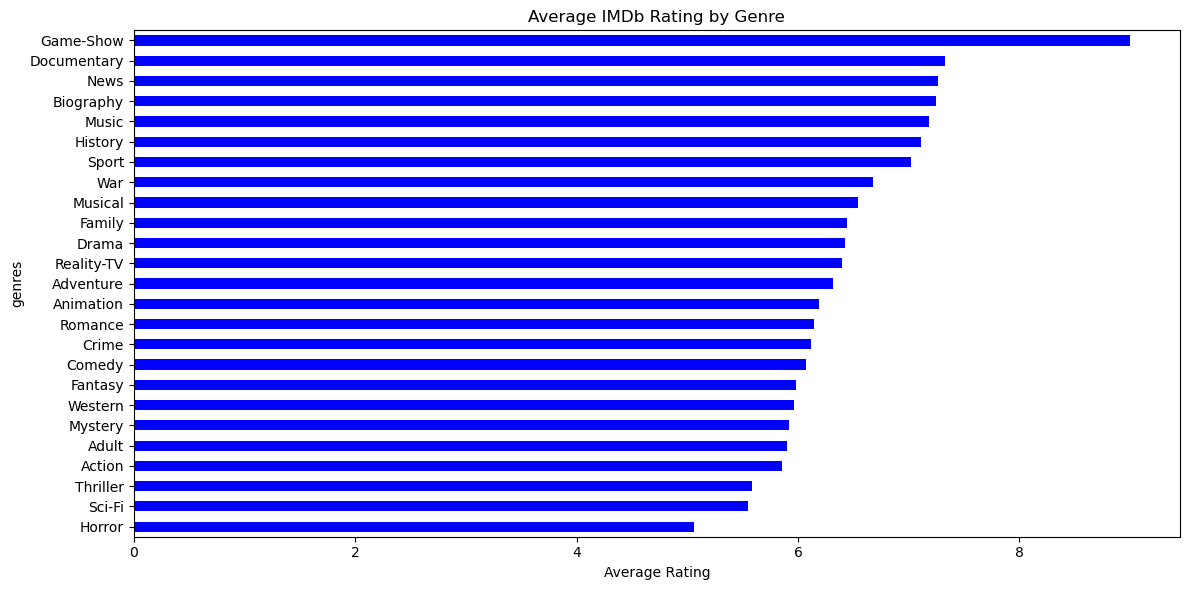

In [127]:
# Plot 1
fig, ax = plt.subplots(figsize=(12, 6))
genre_rating = final_df_exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=True)
genre_rating.plot(kind='barh', ax=ax, color='blue')
ax.set_xlabel('Average Rating')
ax.set_title('Average IMDb Rating by Genre')
plt.tight_layout()
plt.show()


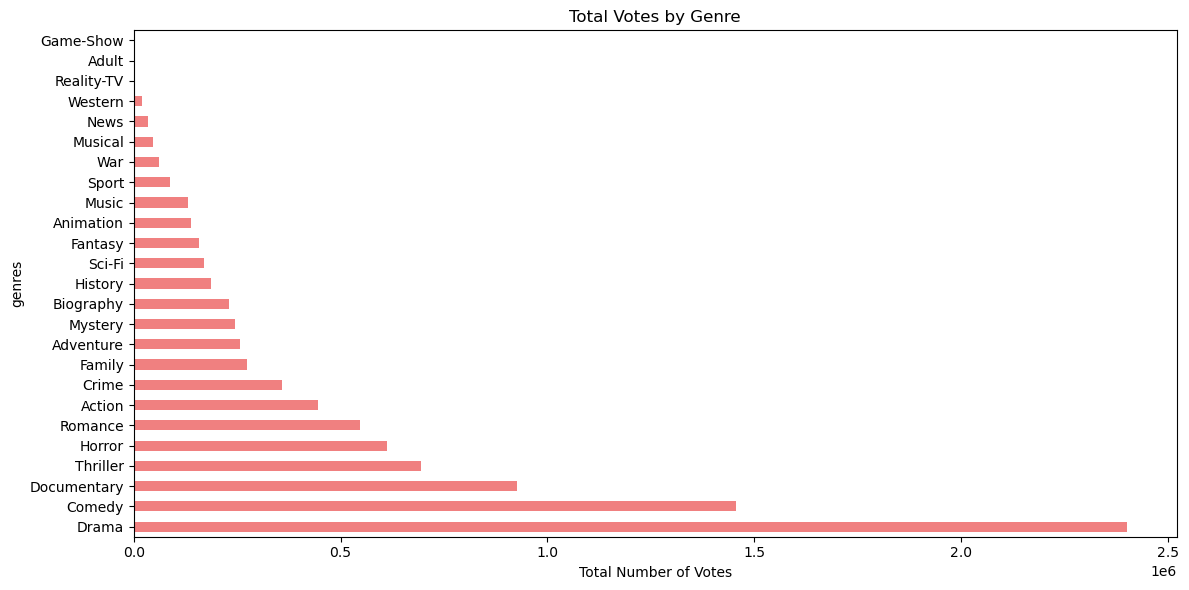

In [128]:
# Plot 2
fig, ax = plt.subplots(figsize=(12, 6))
genre_votes = final_df_exploded.groupby('genres')['numvotes'].sum().sort_values(ascending=False)
genre_votes.plot(kind='barh', ax=ax, color='lightcoral')
ax.set_xlabel('Total Number of Votes')
ax.set_title('Total Votes by Genre')
plt.tight_layout()
plt.show()


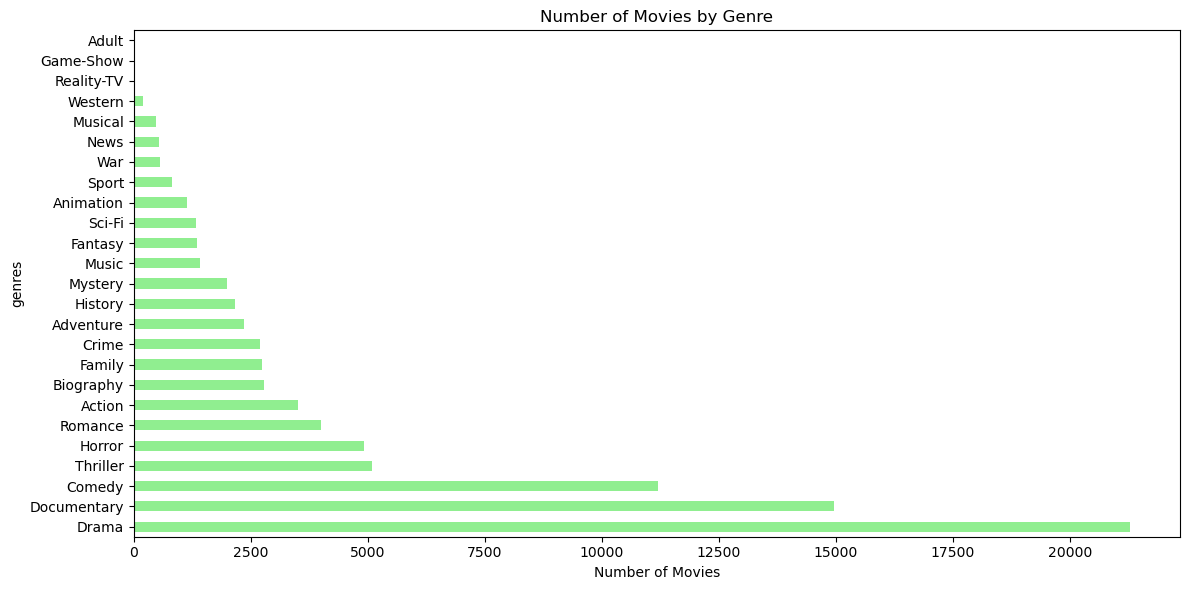

In [129]:
# Plot 3
fig, ax = plt.subplots(figsize=(12, 6))
genre_count = final_df_exploded['genres'].value_counts()
genre_count.plot(kind='barh', ax=ax, color='lightgreen')
ax.set_xlabel('Number of Movies')
ax.set_title('Number of Movies by Genre')
plt.tight_layout()
plt.show()


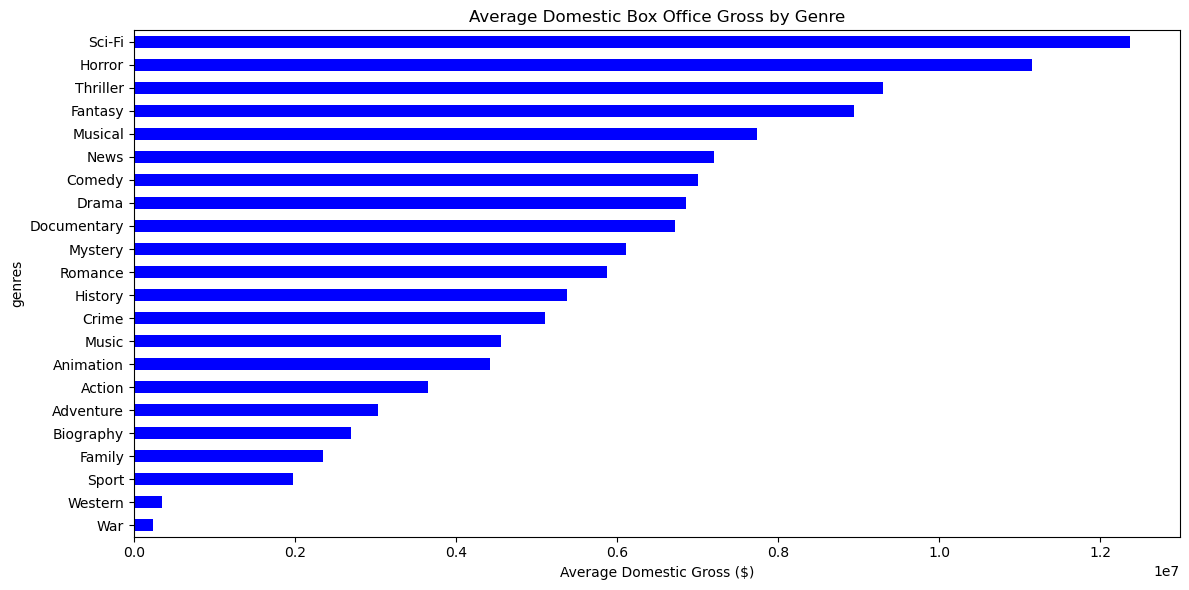

In [130]:
# Plot 4
fig, ax = plt.subplots(figsize=(12, 6))
genre_gross = final_df_exploded[final_df_exploded['domestic_gross'].notna()].groupby('genres')['domestic_gross'].mean().sort_values(ascending=True)
genre_gross.plot(kind='barh', ax=ax, color='blue')
ax.set_xlabel('Average Domestic Gross ($)')
ax.set_title('Average Domestic Box Office Gross by Genre')
plt.tight_layout()
plt.show()

In [131]:
final_df_with_bod = final_df[final_df['domestic_gross'].notna()].copy()

print(f"Movies with box office data: {len(final_df_with_bod)}")
print(f"Sample movies with box office:")
print(final_df_with_bod[['primary_title', 'genres', 'averagerating', 'domestic_gross', 'foreign_gross']].head(10))

final_df_bod_exploded = final_df_with_bod.copy()
final_df_bod_exploded['genres'] = final_df_bod_exploded['genres'].str.split(',')
final_df_bod_exploded = final_df_bod_exploded.explode('genres')
final_df_bod_exploded['genres'] = final_df_bod_exploded['genres'].str.strip()

print(final_df_bod_exploded['genres'].value_counts())

Movies with box office data: 388
Sample movies with box office:
              primary_title                genres  averagerating  \
36               Disconnect  Drama,Mystery,Sci-Fi            4.5   
87   The Hero of Color City      Animation,Family            4.0   
100           The Guardians         Comedy,Family            7.8   
129                   Risen       Biography,Drama            5.3   
270       The Little Prince                Action            8.3   
530                     Eva                 Drama            5.4   
538                  Trance                Horror            4.6   
579             The Joneses          Comedy,Drama            6.9   
758                Snatched                Comedy            5.5   
942          The Taqwacores           Drama,Music            6.1   

     domestic_gross foreign_gross  
36        1400000.0           NaN  
87          32200.0           NaN  
100        177000.0           NaN  
129      36900000.0       9200000  
270    

In [132]:
df2.loc['foreign_gross'] = df2['foreign_gross'].astype('float64')

## Visualization of the top 20 Data

In [133]:
top_20_movies['total_gross'] = (
    pd.to_numeric(top_20_movies['domestic_gross'], errors='coerce').fillna(0) +
    pd.to_numeric(top_20_movies['foreign_gross'], errors='coerce').fillna(0)
)


In [135]:

# Get top 20 movies by domestic gross
top_20_movies = final_df_with_bod.nlargest(20, 'domestic_gross')[['primary_title', 'genres', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']].copy()
top_20_movies['total_gross'] = top_20_movies['domestic_gross'].fillna(0) + top_20_movies['foreign_gross'].fillna(0)

# Create visualizations for top 20 movies
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 20 by Domestic Gross
ax1 = axes[0, 0]
top_20_domestic = top_20_movies.sort_values('domestic_gross', ascending=False)
ax1.barh(top_20_domestic['primary_title'], top_20_domestic['domestic_gross'] / 1e6, color='steelblue')
ax1.set_xlabel('Domestic Gross ($ Millions)')
ax1.set_title('Top 20 Movies by Domestic Box Office')
ax1.invert_yaxis()

# Plot 2: Top 20 by Total Gross
ax2 = axes[0, 1]
top_20_total = top_20_movies.sort_values('foreign_gross', ascending=False)
ax2.barh(top_20_total['primary_title'], top_20_total['foreign_gross'] / 1e6, color='coral')
ax2.set_xlabel('Foreign Gross ($ Millions)')
ax2.set_title('Top 20 Movies by Foreign Box Office')
ax2.invert_yaxis()

# Plot 3: Top 20 by Average Rating
ax3 = axes[1, 0]
top_20_rating = top_20_movies.sort_values('averagerating', ascending=False)
ax3.barh(top_20_rating['primary_title'], top_20_rating['averagerating'], color='mediumseagreen')
ax3.set_xlabel('Average Rating')
ax3.set_title('Top 20 Movies by Average IMDb Rating')
ax3.invert_yaxis()

# Plot 4: Top 20 by Number of Votes
ax4 = axes[1, 1]
top_20_votes = top_20_movies.sort_values('numvotes', ascending=False)
ax4.barh(top_20_votes['primary_title'], top_20_votes['numvotes'] / 1e6, color='gold')
ax4.set_xlabel('Number of Votes (Millions)')
ax4.set_title('Top 20 Movies by Number of Votes')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()




TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
# Removing Duplicates from Top 20 Movies based on 'primary_title'
top_20_cleaned = top_20_movies.sort_values('numvotes', ascending=False).drop_duplicates(subset=['primary_title'], keep='first')


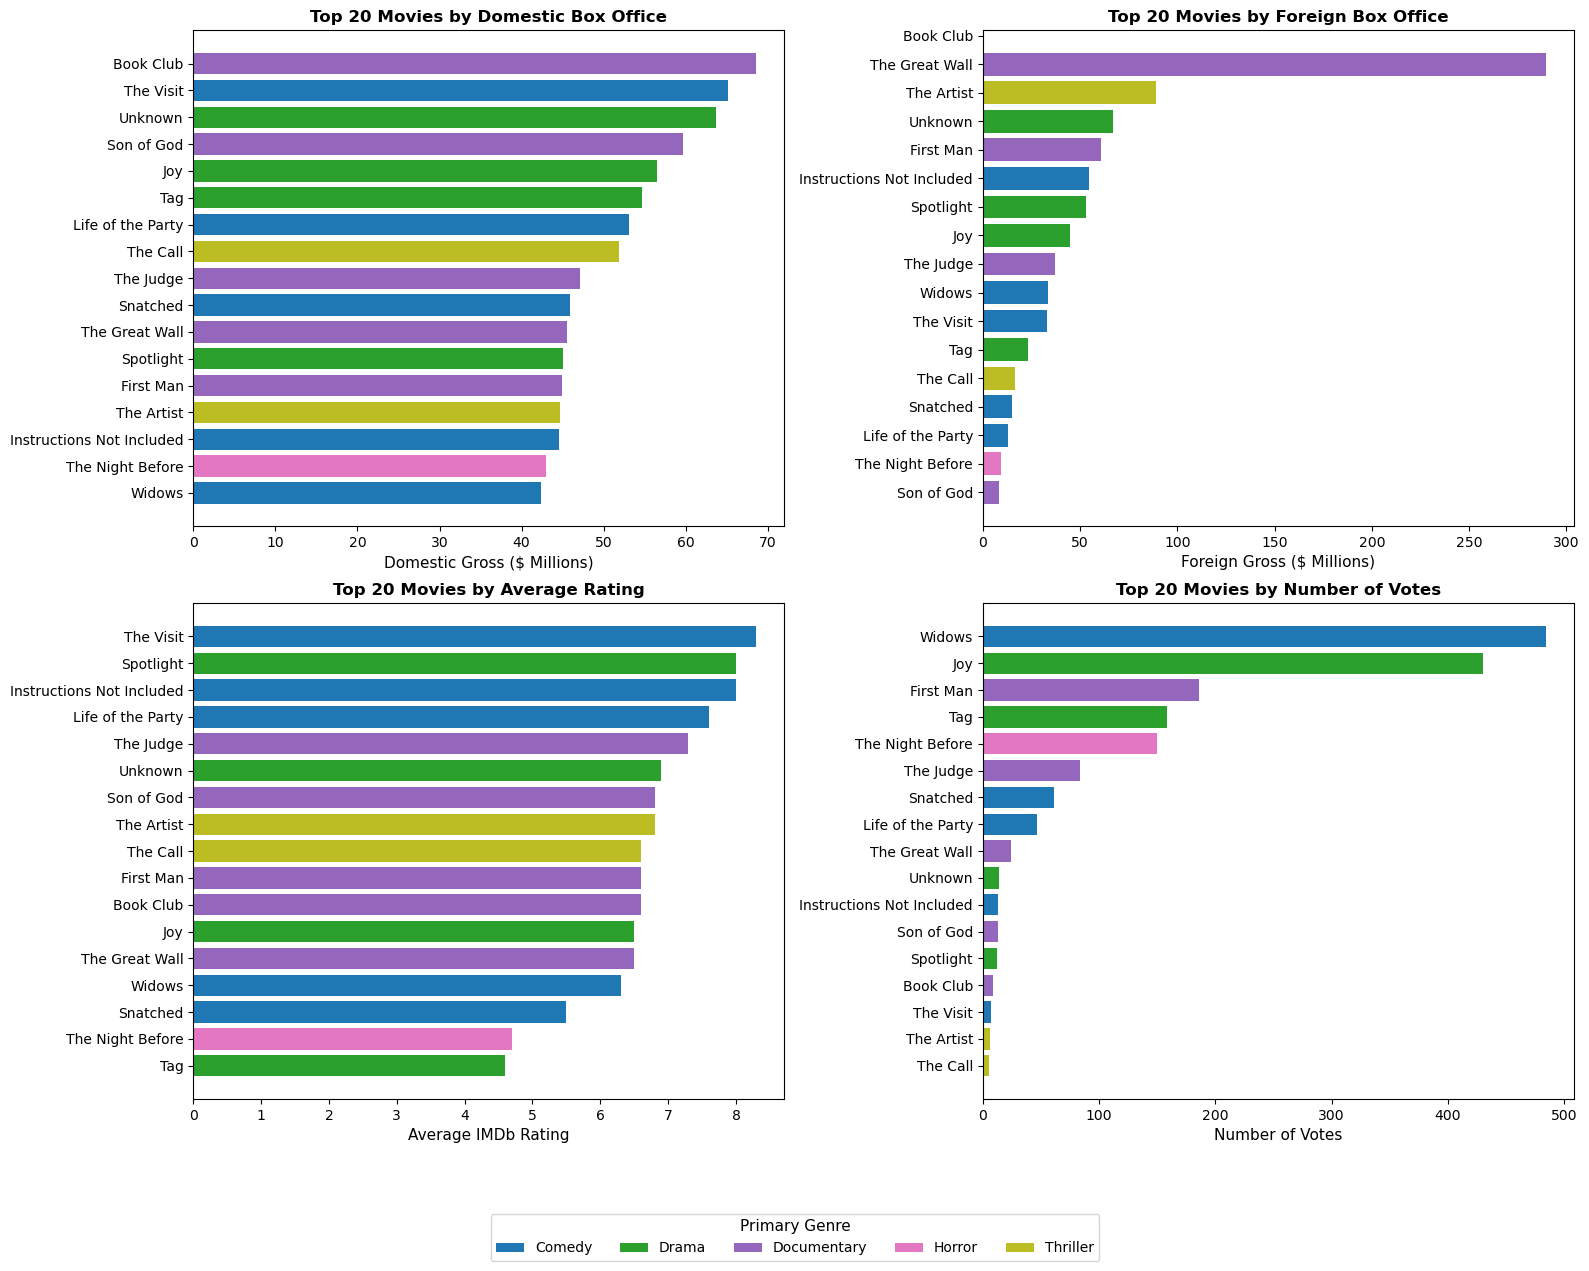

In [ ]:
# Top 20 Movies Visualization with Genre Colors

top_20_movies = top_20_cleaned.copy()
top_20_movies['primary_genre'] = top_20_movies['genres'].str.split(',').str[0].str.strip()
top_20_movies['primary_genre'] = top_20_movies['primary_genre'].fillna('Unknown')

unique_genres = top_20_movies['primary_genre'].unique()
color_map = plt.get_cmap('tab20')
genre_colors = {genre: color_map(i / len(unique_genres)) for i, genre in enumerate(unique_genres)}

# PLots
fig, axes = plt.subplots(2,2, figsize=(16, 12))

# Plot 1
ax1 = axes[0, 0]
top_20_by_domestic = top_20_clean.sort_values('domestic_gross', ascending=True)
colors_domestic = [genre_colors[g] for g in top_20_by_domestic['primary_genre']]
ax1.barh(top_20_by_domestic['primary_title'], top_20_by_domestic['domestic_gross'] / 1e6, color=colors_domestic)
ax1.set_xlabel('Domestic Gross ($ Millions)', fontsize=11)
ax1.set_title('Top 20 Movies by Domestic Box Office', fontsize=12, fontweight='bold')

# Plot 2
ax2 = axes[0, 1]
top_20_by_foreign = top_20_clean.sort_values('foreign_gross', ascending=True)
colors_foreign = [genre_colors[g] for g in top_20_by_foreign['primary_genre']]
ax2.barh(top_20_by_foreign['primary_title'], top_20_by_foreign['foreign_gross'] / 1e6, color=colors_foreign)
ax2.set_xlabel('Foreign Gross ($ Millions)', fontsize=11)
ax2.set_title('Top 20 Movies by Foreign Box Office', fontsize=12, fontweight='bold')

# Plot 3
ax3 = axes[1, 0]
top_20_by_rating = top_20_clean.sort_values('averagerating', ascending=True)
colors_rating = [genre_colors[g] for g in top_20_by_rating['primary_genre']]
ax3.barh(top_20_by_rating['primary_title'], top_20_by_rating['averagerating'], color=colors_rating)
ax3.set_xlabel('Average IMDb Rating', fontsize=11)
ax3.set_title('Top 20 Movies by Average Rating', fontsize=12, fontweight='bold')

# Plot 4
ax4 = axes[1, 1]
top_20_by_votes = top_20_clean.sort_values('numvotes', ascending=True)
colors_votes = [genre_colors[g] for g in top_20_by_votes['primary_genre']]
ax4.barh(top_20_by_votes['primary_title'], top_20_by_votes['numvotes'], color=colors_votes)
ax4.set_xlabel('Number of Votes', fontsize=11)
ax4.set_title('Top 20 Movies by Number of Votes', fontsize=12, fontweight='bold')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=genre_colors[g], label=g) for g in unique_genres if g != 'Unknown']
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5, 
           title='Primary Genre', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()


## New Feature

In [ ]:
final_df_with_age = final_df.copy()

In [ ]:
# Age feature 
current_year = 2026
final_df_with_age['age'] = current_year - final_df_with_age['start_year']

# Creating plot 

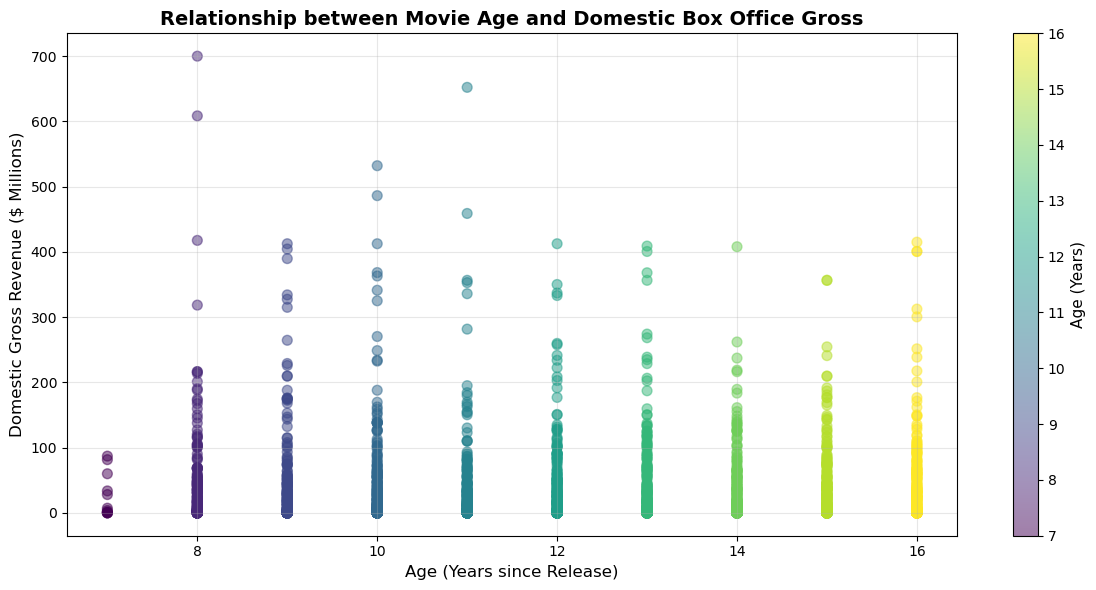

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plot_data = final_df_with_age[final_df_with_age['domestic_gross'].notna() & final_df_with_age['age'].notna()].copy()

# Scatter plot
scatter = ax.scatter(plot_data['age'], plot_data['domestic_gross'] / 1e6, alpha=0.5, s=50, c=plot_data['age'], cmap='viridis')
ax.set_xlabel('Age (Years since Release)', fontsize=12)
ax.set_ylabel('Domestic Gross Revenue ($ Millions)', fontsize=12)
ax.set_title('Relationship between Movie Age and Domestic Box Office Gross', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Age (Years)', fontsize=11)

plt.tight_layout()
plt.show()
